In [1]:
######### Package Import ######################
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from PIL import Image
import random

In [2]:
############## File Loading ##################
tweets_data_path = "Twitter5July_Data.txt"

# Open the file. 'r' means READ.
tweets_file = open(tweets_data_path, 'r')
data_list = []
tweet_count = 0
#Read File and save tweets into a string
for line in tweets_file:
    # strip() function removes end-of-line characters at the end
    # After removing end-of-line characters, see if the line still
    # contains any data. If it does, len() will be > 0.
    # If that's the case, let's save this Tweet Object into our LIST.
    if len(line.strip()) > 0:
        tweet = json.loads(line) # each line is a JSON object
        if 'text' in tweet and tweet['lang'] == 'en':
            data_list.append(tweet['text'])
            tweet_count += 1
            if tweet_count % 10000 == 0:
                print("Tweets Read:", tweet_count)
                
print("Tweets Read:", tweet_count)
news_content = " ".join(data_list).lower()
# print(news_content[:500])

Tweets Read: 10000
Tweets Read: 20000
Tweets Read: 30000
Tweets Read: 40000
Tweets Read: 50000
Tweets Read: 60000
Tweets Read: 68513


In [3]:
############### Tokenize Words ###################
# word_tokenize() function takes a text blob and breaks it into 'words'.
tokenizer = RegexpTokenizer(r'\w+')
#news_words = word_tokenize(news_content)
news_words = tokenizer.tokenize(news_content)
# print (news_words)
# How many words are in this news article?
print ("Total Number of Words",len(news_words))

Total Number of Words 1413551


In [8]:
################# Load Stopwords #################
# Let's load up English corpus from NLTK package.
stop_words = stopwords.words('english')
# See what words are inside.
stop_words = stop_words + ['rt','blacklivesmatter', 'blacklivesmatters', 'https', 'http', "blm", "co", "amp", "black", "news", "similar", "groups", "zero", "response", "police", "live", "people", "beautiful", "f777vjvpxpp", "since", "women", "men", "f777jvpxpp"]
# print (stop_words)


In [9]:
########### Filter out Stopwords ############
news_words_filtered = []

for w in news_words:
    if w not in stop_words:
        news_words_filtered.append(w)

# After removing stop words, how many words remain?
print ("Total Number of Words after Filter:",len(news_words_filtered))
# print(news_words_filtered)

Total Number of Words after Filter: 652400


In [10]:
############# Word Stemming ############3#
porter_stemmer = PorterStemmer()

# Let's stem all the words in our news article.
news_words_filtered_stemmed = []
for w in news_words_filtered:
    news_words_filtered_stemmed.append(porter_stemmer.stem(w))

print("Words Stemmed")
# print (news_words_filtered_stemmed[:500])

Words Stemmed


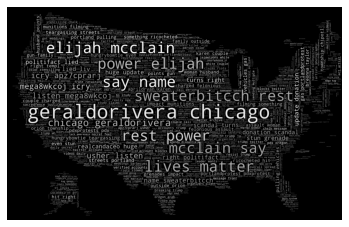

WordCloud Original


In [11]:
############# Form Word Cloud ###############
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
    
# Word Cloud takes a string. Convert our list of words into a string.
words_joined_stemmed = " ".join([w for w in news_words_filtered_stemmed])
words_joined = " ".join([w for w in news_words_filtered])
# print(words_joined[:1000])

mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
my_wordcloud = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

# worldcloud2 = WordCloud(background_color='white',
#                          width=3000,
#                          height=2000, stopwords = ["black liv", "updat"]).generate(words_joined_stemmed)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.savefig('TwitterWFCloud.png', dpi=300)
plt.show()
print("WordCloud Original")

# plt.imshow(worldcloud2)
# plt.axis('off')
# plt.show()
# print("WorldCloud Stemmed")




Geraldorivera -> Twitter User, Trending cost of this post https://twitter.com/GeraldoRivera/status/1277937087787020293

Chicago News referring to same as ^

Similar groups referring to same as ^

Since Zero referring to same as ^


Justice for Eljiah McClain



In [15]:
#instantiate CountVectorizer()
# print(len(data_list)*0.001)

Vector_stop_words = stopwords.words('english')
Vector_stop_words = Vector_stop_words + ['rt','blacklivesmatter', 'blacklivesmatters', 'https', 'http', "blm", "co", "amp","vicpo"]

cv=CountVectorizer(max_df = 0.85, stop_words =Vector_stop_words, min_df = 0.001, ngram_range= (1,3))

# this steps generates word counts for the words in your docs
word_count_vector=cv.fit_transform(data_list)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)

# print(word_count_vector)
#(294165 , 149940) refers to 294165 documents, 149940 refers to vocabulary size
# print idf values

df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])

# sort ascending
df_sorted = df_idf.sort_values(by=['idf_weights'], ascending = False)

# print(word_count_vector.stop_words_)
print("Printing top 20 out of", len(df_sorted))
print(df_sorted[:20])

Printing top 20 out of 3445
                               idf_weights
california                        7.886298
progressiveicon                   7.886298
chanting                          7.886298
either                            7.886298
protesters police                 7.886298
rayshard                          7.886298
ellymelly danandrews prepared     7.886298
grow                              7.886298
outside strap                     7.886298
truly                             7.886298
blackli                           7.886298
minneapolis                       7.886298
short                             7.886298
underground                       7.886298
ellymelly danandrews              7.886298
board                             7.886298
naacp                             7.886298
whitehouse                        7.886298
future                            7.886298
le_maria21                        7.886298


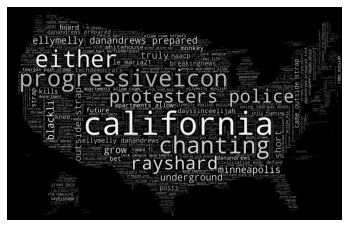

In [16]:
########## Generate IDF word cloud ################333

mask = np.array(Image.open("../usaMap2.jpg"))
# Create a word cloud
wc = WordCloud(background_color='black',
                         width=3000,
                         height=2000,
                         mask = mask,
                         max_words = 2000,
                         color_func=grey_color_func).generate(words_joined)

weights = df_sorted.to_dict()

wc.generate_from_frequencies(weights['idf_weights'])

plt.imshow(wc)
plt.axis('off')
plt.savefig('TwitterIDFCloud.png', dpi=300)
plt.show()